# Home assigment 1

Please give your name below:

In [ ]:
name='Hampus Naumanen'

## Exercise 1

In nature Uranium is commonly available in the form of two isotopes: $^{235}U$ and $^{238}U$. Let us define Uranium enrichment as:
\begin{equation}
\epsilon= \frac{N_{^{235}U}}{N_{^{235}U}+N_{^{238}U}}
\end{equation}

where $N$ indicates the number of atoms in a given volume. The half-lives are $4.51 \times 10^9$ and $7.13 \times 10^8$ yr for $^{238}U$ and $^{235}U$, respectively. Today, the natural enrichment is $0.72 \%$, whereas a typical LWR fuel has an enrichment of $2-5 w\%$. It is notable that in the past natural uranium contained enough $^{235}U$ that LWRs could have been built without requiring further enrichment. In fact, evidance shows that cca $1.7 \times 10^9$ yr ago at certain locations such as in Oklo, Gabon the conditions were ideal for the formation of [natural nuclear fission reactors](https://en.wikipedia.org/wiki/Natural_nuclear_fission_reactor). 

- Derive the equation that describes the evolution of the enrichment in time. (hint: use markdown and Latex to document your derivation)
- Define a program function which evaluates the enrichment at a certain time in the past. The function should be able to handle array-like inputs (hint: you can use numpy). 
- Evaluate the function and print the enrichment 
    - at the birth of Earth ($4.5 \times 10^9$ years ago)
    - at the time when the Oklo reactor "operated" ($1.7 \times 10^9$ years ago)
- Plot the enrichment of uranium versus time in the past. Include a vertical line (`plt.axvline`) at the two times highlighted above


### Solution

If uranium enrichment is defined as followed


\begin{equation}
    \epsilon = \frac{N_{235U}}{N_{235U}+N_{238U}}
\end{equation}

where N is the amount of the substance. We can introduce the equation

\begin{equation}
    N = N_{0}\frac{1}{2}^{\frac{t}{T_{1/2}}}
\end{equation}

which describes the half-life of a substance. If we combine (1) and (2) we get the following expression

\begin{equation}
    \epsilon = \frac{N_{0}^{235}\frac{1}{2}^{\frac{t}{T_{1/2}^{235}}}}{N_{0}^{235}\frac{1}{2}^{\frac{t}{T_{1/2}^{235}}}+N_{0}^{238}\frac{1}{2}^{\frac{t}{T_{1/2}^{238}}}}
\end{equation}

Let's set our $t=0$ when the uranium enrichment is 0.72\%. That will lead us to the following relation

\begin{equation}
    \epsilon = \frac{N_{0}^{235}}{N_{0}^{235}+N_{0}^{238}} = 0.0072
    \iff
    100*\epsilon = \frac{N_{0}^{235}}{N_{0}^{235}+N_{0}^{238}} = 0.72
\end{equation}

from which we can see that

\begin{equation}
    0.0072 = \frac{N_{0}^{235}}{N_{0}^{235}+N_{0}^{238}}
    \iff
    N_{0}^{235} = \frac{0.0072}{99.28}N_{0}^{238}
\end{equation}

If we now combine (3) and (5) we get the following

\begin{equation}
    \epsilon = \frac{0.0072}{99.28}\frac{N_{0}^{238}\frac{1}{2}^{\frac{t}{T_{1/2}^{235}}}}{\frac{0.0072}{99.28}N_{0}^{238}\frac{1}{2}^{\frac{t}{T_{1/2}^{235}}}+N_{0}^{238}\frac{1}{2}^{\frac{t}{T_{1/2}^{238}}}}
\end{equation}

which will be reduced to

\begin{equation}
    \epsilon = \frac{0.0072}{99.28}\frac{\frac{1}{2}^{\frac{t}{T_{1/2}^{235}}}}{\frac{0.0072}{99.28}\frac{1}{2}^{\frac{t}{T_{1/2}^{235}}}+\frac{1}{2}^{\frac{t}{T_{1/2}^{238}}}}
\end{equation}

and if we put in the half-lifes of U235 and U238 and want to display the result as a percentage

\begin{equation}
    \epsilon = 100*\frac{0.0072}{99.28}\frac{(\frac{1}{2})^{\frac{t}{7.13*10^8}}}{\frac{0.0072}{99.28}(\frac{1}{2})^{\frac{t}{7.13*10^8}}+(\frac{1}{2})^{\frac{t}{4.51*10^9}}}
\end{equation}

If we evaluate this expression at $t=0$ we get $\epsilon = 0.00725$ which is approximately the 0.72\% that we wanted. If we evaluate this expression at $t=-1.7*10^9$ we get $\epsilon = 0.0289$ which would be almost 3\%

Enrichment at the beginning of earth:  0.2875850117382214
Enrichment at Okla:  0.029148563716474857


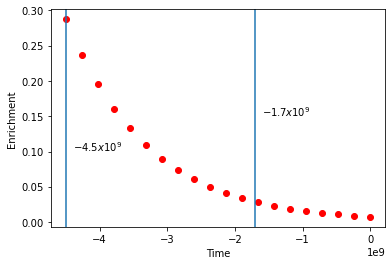

In [2]:
# -*- coding: utf-8 -*-
"""
Created on Mon Jun 21 21:01:55 2021

@author: Hampus
"""

import numpy as np
import matplotlib.pyplot as plt

def epsilon(t):
    """Function to evaluate Uranium enrichment at time t. The parameter t can be both float or array."""
    const = 0.0072/99.28
    halfLifeU235 = 7.13*10**8
    halfLifeU238 = 4.51*10**9
    upper_eps = 100*const*(1/2)**(t/halfLifeU235)
    lower_eps = const*(1/2)**(t/halfLifeU235) + (1/2)**(t/halfLifeU238)
    
    eps = upper_eps/lower_eps
    return eps

def main():
    print('Enrichment at the beginning of earth: ', epsilon(-4.5*10**9))
    print('Enrichment at Okla: ', epsilon(-1.7*10**9))


    a = np.linspace(-4.5*10**9, 0, num=20)
    
    b = epsilon(a)
    
    #print(b)
    
    fig = plt.figure()
    plt.plot(a,b, 'ro')
    plt.axvline(-4.5*10**9)
    plt.axvline(-1.7*10**9)
    plt.ylabel('Enrichment')
    plt.xlabel('Time')
    plt.annotate(r'$-1.7x10^9$',(-1.6*10**9,0.15))
    plt.annotate(r'$-4.5x10^9$',(-4.4*10**9,0.10))
    plt.show()
    
if __name__ == "__main__":
    main()